# audio spectrum

録音中
終了


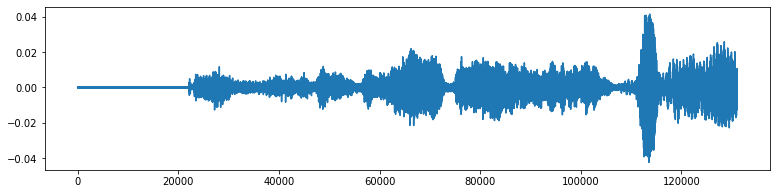

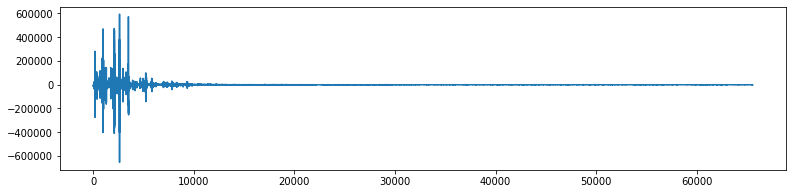

In [1]:
# -*- coding: utf-8 -*-
import pyaudio
import sys
import time
import wave
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
 
def recording(CHANNELS,RATE,CHUNK,RECORD_SECONDS,FORMAT,p):
    print("録音中")
    stream = p.open(format = FORMAT,
                        channels = CHANNELS,
                        rate = RATE,
                        input = True,
                        frames_per_buffer = CHUNK)
 
    all = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        all.append(data)
    stream.close()
    p.terminate()
    data = b''.join(all)
    print("終了")
    visualization(data)
 
def visualization(data):
    x = np.frombuffer(data, dtype="int16") / 10000
 
    plt.figure(figsize=(13,3))
    plt.plot(x)
    plt.show()
 
    x = np.fft.fft(np.frombuffer(data, dtype="int16"))
 
    plt.figure(figsize=(13,3))
    plt.plot(x.real[:int(len(x)/2)])
    plt.show()
 
if __name__ == '__main__':
    CHANNELS = 1
    RATE = 44100
    CHUNK = 2**11
    RECORD_SECONDS = 3
    FORMAT = pyaudio.paInt16
    p = pyaudio.PyAudio()
    recording(CHANNELS,RATE,CHUNK,RECORD_SECONDS,FORMAT,p)